# Test Case 1

## 1. Theory

The first case to be considered is the determination of the plane wave reflection coefficient according to the measured pressure. A source $\mathbf{s}$ generates a plane wave $P$ that reaches the receiver $\mathbf{r}$ by the direct path $r_1$ and the reflected $r_2$.

![title](planewave.png)

In the frequency domain, the total pressure measured at $\mathbf{r}$, $P_t$, is the sum of the direct and reflected sound.

$$P_t=P\Bigg(\frac{H_1}{r_1}+\frac{H_2}{r_2}R_p\Bigg)$$

where $H_1$ is the directivity response of the source in the direct path, $H_2$ the directivity response in the reflected path and $R_p$ the plane wave reflection coefficient, defined as the ratio between direct and reflected sound pressure.

$$R_p(\alpha)=\frac{p_r}{p_i}=\frac{Z_s\cos(\alpha)-\rho c}{Z_s\cos(\alpha)+\rho c}$$

The reflection coefficient is dependent on the surface impedace of the material $Z_s$, the angle of incidence $\alpha$, the speed of sound $c=20.05\sqrt{273.15+t_0}$, being $t_0$ the measured temperature in celsius, and the density of air $\rho$. Thanks to the previous work done by other authors like Delaney and Bazley the surface impedance of porous materials can be approximated by a power law expression dependent on a parameter common for all the frequencies that defines the material. This is the flow resistivity $\sigma$, given in [Ns/m$^4]$

$$Z_s=\rho c\Bigg(1+9.08\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.75}-j11.9\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.73}\Bigg)$$.

This expression was improved by Miki et al. defining it in a causal form

$$Z_s=\rho c\Bigg(1+5.51\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.632}-j8.42\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.632}\Bigg)$$.

It can be seen that inferring sigma the impedance and therefore the reflection coefficient are also inferred. In order to infer the flow resistivity of the surface from measurements using STAN, real and imaginary parts need to be isolated as complex numbers are not supported by the platform. Therefore we will have for each frequency band the following (subindexes $r$ and $i$ represent real and imaginary parts respectively)

$$P_t=(P_r+jP_i)\Bigg(\frac{1}{r_1}(H_{1r}+jH_{1i})+\frac{1}{r_2}(H_{2r}+jH_{2i})(R_{pr}+jR_{pi})\Bigg)=$$
$$= (P_r+jP_i)\Bigg(\frac{H_{1r}+jH_{1i}}{r_1}+\frac{1}{r_2}(H_{2r}R_{pr}+jH_{2r}R_{pi}+jH_{2i}R_{pr}-H_{2i}R_{pi})\Bigg)=$$
$$=\Bigg(\frac{1}{r_1}(P_rH_{1r}+jP_rH_{1i}+jP_iH_{1r}-P_iH_{1i})+\frac{1}{r_2}(P_rH_{2r}R_{pr}+jP_rH_{2r}R_{pi}+jP_rH_{2i}R_{pr}-P_rH_{2i}R_{pi}+jP_iH_{2r}R_{pr}-P_iH_{2r}R_{pi}-P_iH_{2i}R_{pr}-jP_iH_{2i}R_{pi})\Bigg)$$

Real and imaginary

$$\text{Re}(P_t)=\Bigg(\frac{1}{r_1}(P_rH_{1r}-P_iH_{1i})+\frac{1}{r_2}(P_rH_{2r}R_{pr}-P_rH_{2i}R_{pi}-P_iH_{2r}R_{pi}-P_iH_{2i}R_{pr})\Bigg)$$
$$\text{Im}(P_t)=\Bigg(\frac{1}{r_1}(P_rH_{1i}+P_iH_{1r})+\frac{1}{r_2}(P_rH_{2r}R_{pi}+P_rH_{2i}R_{pr}+P_iH_{2r}R_{pr}-P_iH_{2i}R_{pi})\Bigg)$$

The surface impedance then can be defined as

$$Z_s=\rho c(A+jB)$$

and the reflection coefficient

$$R_p=\frac{(A+jB)\cos(\alpha)-1}{(A+jB)\cos(\alpha)+1}=\frac{A\cos(\alpha)-1+jB\cos(\alpha)}{A\cos(\alpha)+1+jB\cos(\alpha)}=\frac{[A\cos(\alpha)-1+jB\cos(\alpha)][A\cos(\alpha)+1-jB\cos(\alpha)]}{[A\cos(\alpha)+1+jB\cos(\alpha)][A\cos(\alpha)+1-jB\cos(\alpha)]}=\frac{(A\cos(\alpha))^2-1-jAB\cos^2(\alpha)+jB\cos(\alpha)+jAB\cos^2(\alpha)+jB\cos(\alpha)+(B\cos(\alpha))^2}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}=\frac{(A\cos(\alpha))^2-1+(B\cos(\alpha))^2+j(2B\cos(\alpha))}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}=\frac{(A^2-B^2)\cos^2(\alpha)-1+j2B\cos(\alpha)}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}$$

Real and imaginary

$$\text{Re}(R_p)=R_{pr}=\frac{(A^2-B^2)\cos^2(\alpha)-1}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}$$
$$\text{Im}(R_p)=R_{pi}=\frac{2B\cos(\alpha)}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}$$

where

$$A=1+5.51\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.632}$$
$$B=-8.42\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.632}$$

For the simplest case where $P=H_1=H_2=1$, we have

$$\text{Re}(P_t)=\frac{1}{r_1}+\frac{1}{r_2}(R_{pr})$$
$$\text{Im}(P_t)=\frac{1}{r_2}(R_{pi})$$

## 2. Synthetic data

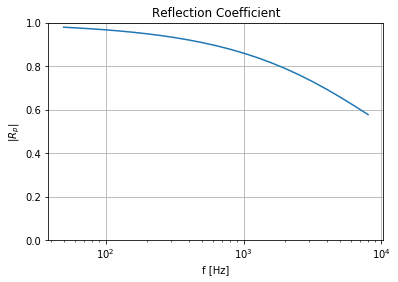

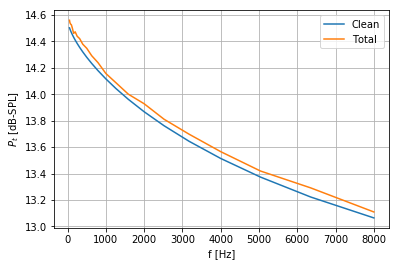

In [21]:
#INITIALIZATION
from __future__ import division
import numpy as np
import scipy as sc
import pystan
#from psis import psisloo
#import angle2segments as a2s
import math
%matplotlib inline
import matplotlib.pyplot as plt

# Define problem variables
## Fequencies
n = 23;
f = np.zeros(n, dtype=np.float)
f[n-1] = 8000;
pref = 20*np.exp(-6);
for i in np.arange(0,n-1):
    f[n-2-i] = f[n-1-i]/2**(1/3)
## Coordinates
s = [1, 6]
si = [s[0],-s[1]]
r = [1, 2]
r1 = np.linalg.norm(np.subtract(s,r))
r2 = np.linalg.norm(np.subtract(si,r))
## Find angle of incidence
alpha = math.pi/2-math.acos(np.abs(r[0]-s[0])/r2)
## Flow resistivity, impedance...
sigma = 650000
T = 25
c = 20.05*np.sqrt(273.15+T)
rho = 1.2
Zs = (1+5.51*(1000*f/sigma)**(-0.632)-8.42j*(1000*f/sigma)**(-0.632))
Rp = (Zs*np.cos(alpha)-1)/(Zs*np.cos(alpha)+1)
## Signal and source responses
S = np.ones(n, dtype=np.float)
H1 = np.ones(n, dtype=np.float)
H2 = np.ones(n, dtype=np.float)
## Total pressure
pt_clean = S*(H1/r1+Rp*H2/r2)
## Noise
SNR = 40
An = abs(pt_clean/10**(SNR/20))
Phin = np.random.normal(0,1, size=(10, len(f)))

pt = pt_clean+An*np.exp(1j*Phin)
pt_real = np.real(pt)
pt_imag = np.imag(pt)


plt.plot(f,np.abs(Rp))
plt.xscale('log')
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel(r'$|R_p|$')
plt.ylim(0,1)
plt.title(r'Reflection Coefficient')
plt.show()
plt.figure()
#plt.plot(f,20*np.log10(abs(An/np.sqrt(2)/pref)))
plt.plot(f,20*np.log10(abs(pt_clean/np.sqrt(2)/pref)))
plt.plot(f,20*np.log10(abs(np.mean(pt, axis=0)/np.sqrt(2)/pref)))
plt.legend(['Clean', 'Total'])
plt.xlabel('f [Hz]')
plt.ylabel(r'$P_t$ [dB-SPL]')
plt.grid()

## 3. Inference

<p>The parameters that we can measure or we know.
1. Total pressure: $P_t$.
2. Temperature: $T$. Accuracy $\pm 0.2^{\circ}$C (Vaisala WTS520).
3. Coordinates: $\mathbf{s}$ and $\mathbf{r}$. Accuracy $\pm 0.015$ m. Also inaccuracy due to the bad manipulation of the device should be included.
4. Flow resistivity: $\sigma$. We know and approximation but we want to infer it. Nord2000 and Nordtest ranges. In this case, lets assume the case of compacted field and gravel $\rightarrow$ 500 [kNs/m$^4$] and a range of [400-630].
5. Directivity and source signals: We will assume they are equal to one.

![title](Inference_Diagram_plane.png)


In [2]:
# Known data from sensors and forward model (deviation, etc...)
T_dev = 0.2
r_dev = 0.015
sigma_mean = 500000
sigma_dev = 200000
# Measured data with errors (Synthetic data)
Tm = T #np.random.normal(T, T_dev)
sm = np.random.normal(s, r_dev);
rm = np.random.normal(r, r_dev);
D = len(rm) # Dimensions
sm

array([ 0.97125787,  6.0205925 ])

## Priors

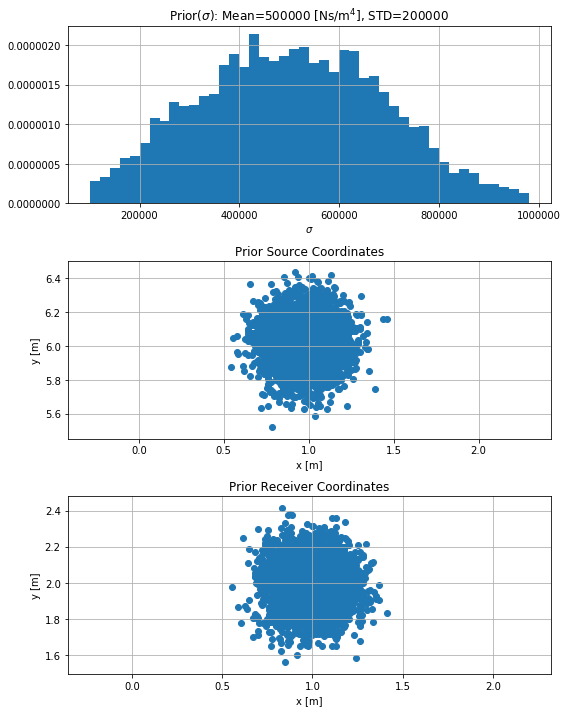

In [3]:
#samples = fit.extract(permuted=True)
plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.hist(np.random.normal(sigma_mean,sigma_dev,4000),normed=True,bins=np.arange(100000, 1000000, 20000))
plt.title(r'Prior($\sigma$): Mean='+str(sigma_mean)+' [Ns/m$^4$], STD='+str(sigma_dev))
plt.grid()
plt.xlabel(r'$\sigma$')
cov = [[r_dev, 0],[0 ,r_dev]]
x = np.random.multivariate_normal(sm,cov,4000)
plt.subplot(3,1,2)
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')
plt.title(r'Prior Source Coordinates')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.grid()
plt.subplot(3,1,3)
x = np.random.multivariate_normal(rm,cov,4000)
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')
plt.title(r'Prior Receiver Coordinates')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.grid()
plt.show
plt.tight_layout()

## Model Sigma and coordinates (It works)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_04e92a102448b3085da2bceab5e5886c NOW.


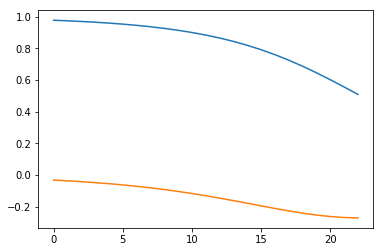

In [15]:
data = dict(
    N=len(f), 
    D=D, 
    f=f, 
    pt_real=pt_real, 
    pt_imag=pt_imag, 
    T=Tm, 
    T_dev=T_dev, 
    rho=rho, 
    r=r,
    r_mean=rm,
    s_mean=sm, 
    r_dev=r_dev,
    sigma_mean=sigma, 
    sigma_dev=sigma_dev,
    alpha=alpha,
    tau = 1
)

plt.plot(np.real(Rp))
plt.plot(np.imag(Rp))

reflection_coef = """
data {
    int<lower=0> N; // number of frequencies
    int<lower=0> D; // Dimensions
    vector[D] s_mean; // Coordinates source. Prior mean
    vector[D] r_mean; // Coordinates receiver. Prior mean
    matrix[10, N] pt_real; // Pressure at receiver. Real part
    matrix[10, N] pt_imag; // Pressure at receiver. Imaginary part
    vector[N] f; // frequencies
    real T; // Temperature. Prior mean
    real r_dev; // Distance deviation
    real sigma_mean; // Nordtest approximation. Prior mean
    real sigma_dev; // Sigma deviation
    real rho; // density
    real tau;
}
parameters {
    real<lower=0> sigma; // Flow resistivity greater than 0
    vector[D] s; // coordinates source
    vector[D] r; // coordinates receiver
    real epsilon_real; // variance of the banckground noise
    real epsilon_imag; // variance of the banckground noise
}
model {
    vector[N] A;
    vector[N] B;
    vector[N] Rpr;
    vector[N] Rpi;
    vector[N] den;
    vector[N] mu_real;
    vector[N] mu_imag;
    real r1;
    real r2;
    real alpha;
    
    for (n in 1:D){
        s[n] ~ normal(s_mean[n],r_dev); // Prior for source coordinates
        r[n] ~ normal(r_mean[n],r_dev); // Prior for source coordinates
        }
    
    r1 = sqrt((s[1]-r[1])^2+(s[2]-r[2])^2); // Direct path
    r2 = sqrt((s[1]-r[1])^2+(-s[2]-r[2])^2); // Reflected path
    alpha = pi()/2-atan(fabs(s[2]+r[2])/fabs(s[1]-r[1])); // Angle of incidence
    
    sigma ~ normal(sigma_mean, sigma_dev);
    
    for (n in 1:N){
        A[n] = 1+5.51*(1000*f[n]/sigma)^(-0.632);
        B[n] = -8.42*(1000*f[n]/sigma)^(-0.632);
        den[n] = (A[n]*cos(alpha)+1)^2+(B[n]*cos(alpha))^2;
        Rpr[n] = ((A[n]^2-B[n]^2)*cos(alpha)^2-1)/den[n];
        Rpi[n] = (2*B[n]*cos(alpha)^2)/den[n];
        mu_real[n] = 1/r1+1/r2*Rpr[n];
        mu_imag[n] = 1/r2*Rpi[n];
        pt_real[n] ~ normal(mu_real[n], epsilon_real); // I think the problem is here in both real and imaginary part.
        pt_imag[n] ~ normal(mu_imag[n], epsilon_imag); // Maybe the transformed parameters should be in generated quantities.
      }
    
}
"""

fit = pystan.stan(model_code=reflection_coef, data=data)


In [6]:
samples = fit.extract(permuted=True)

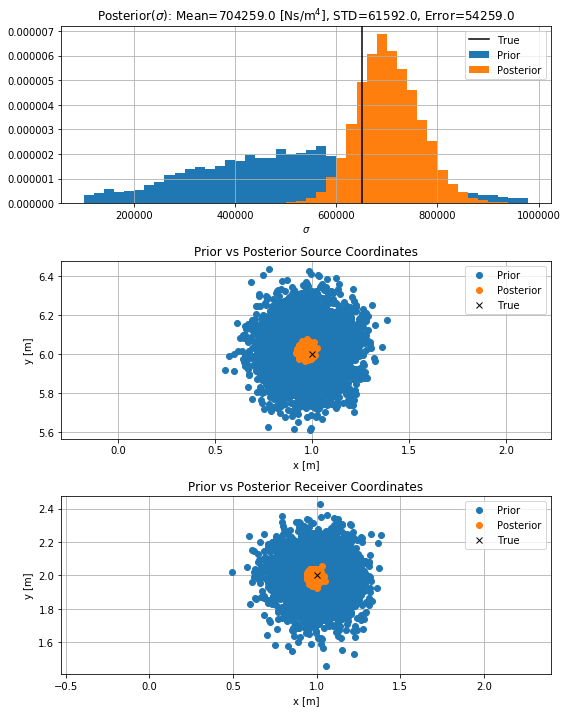

In [7]:
plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.hist(np.random.normal(sigma_mean,sigma_dev,4000),normed=True,bins=np.arange(100000, 1000000, 20000))
plt.hist(fit['sigma'],bins=np.arange(100000, 1000000, 20000),normed=True)
plt.axvline(x=sigma,color='k')
plt.title(r'Posterior($\sigma$): Mean='+str(round(np.mean(fit['sigma'])))+' [Ns/m$^4$], STD='+str(round(np.std(fit['sigma'])))
          +', Error='+str(round(np.mean(fit['sigma'])-sigma)))
plt.grid()
plt.xlabel(r'$\sigma$')
plt.legend(['True','Prior','Posterior'])
cov = [[r_dev, 0],[0 ,r_dev]]
x = np.random.multivariate_normal(sm,cov,4000)
plt.subplot(3,1,2)
A,=plt.plot(x[:,0],x[:,1],'o')
B,=plt.plot(samples['s'][:,0],samples['s'][:,1],'o')
C,=plt.plot(s[0],s[1],'x', color='k')
plt.axis('equal')
plt.title(r'Prior vs Posterior Source Coordinates')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.legend([A,B,C],['Prior','Posterior','True'])
plt.grid()
plt.subplot(3,1,3)
x = np.random.multivariate_normal(rm,cov,4000)
A,=plt.plot(x[:,0],x[:,1],'o')
B,=plt.plot(samples['r'][:,0],samples['r'][:,1],'o')
C,=plt.plot(r[0],r[1],'x', color='k')
plt.axis('equal')
plt.title(r'Prior vs Posterior Receiver Coordinates')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.legend([A,B,C],['Prior','Posterior','True'])
plt.grid()
plt.show
plt.tight_layout()

In [8]:
fit

Inference for Stan model: anon_model_1ff7a503797d2f240c01bafb65190289.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma         7.0e5  1154.0  6.2e4  5.9e5  6.6e5  7.0e5  7.4e5  8.3e5 2849.0    1.0
s[0]           0.97  2.8e-4   0.01   0.94   0.96   0.97   0.98    1.0 2776.0    1.0
s[1]           6.02  2.7e-4   0.02   5.99   6.01   6.02   6.03   6.05 3142.0    1.0
r[0]           0.99  2.9e-4   0.02   0.96   0.98   0.99    1.0   1.02 2846.0    1.0
r[1]           1.99  2.7e-4   0.01   1.96   1.98   1.99    2.0   2.02 3056.0    1.0
epsilon_real   0.15  4.8e-4   0.02   0.11   0.13   0.14   0.16    0.2 2176.0    1.0
epsilon_imag 2.6e-3  7.4e-6 4.2e-4 1.9e-3 2.3e-3 2.5e-3 2.8e-3 3.6e-3 3274.0    nan
lp__         171.18    0.05   1.89 166.67 170.18  171.5 172.58 173.93 1675.0    1.0

Samples were drawn using NUTS at Tue Apr 25 10:27:20 2